<a href="https://colab.research.google.com/github/NoamTene/Udemy/blob/master/Udemy_scatter_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

The followwing raw github is a frozen version of https://www.kaggle.com/andrewmvd/udemy-courses/download.  We believe that this file is just a small sample of all Udemy offerings but have chosen to use it as a snapshot of older course stats so we can compare them with more recent values and see if and how they changed.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/datasets_646598_1162286_udemy_courses.csv')
df.shape

(3678, 12)

sum(num_subscribers)= 11759120


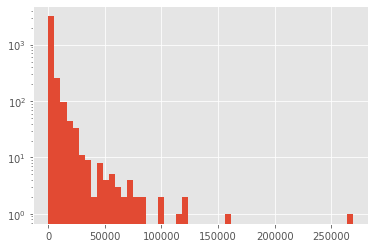

In [3]:
print("sum(num_subscribers)=",df.num_subscribers.sum())
plt.yscale('log')
plt.hist(df.num_subscribers,bins=50);

We can now see that there is indeed only one course with more than 250,000 subscribers which is more than 2% of all subscribers in the data set.
We also see that there are only a few others with more than 80,000.  

We can not ignore these few outliers because as few as they are, they represent a significant percentage of the total Udemy subscribers (and the corresponding enrollment and possible revenue).  However, we already know that they form their own category and need to be analyzed separately if we want our statistical analysis to have any meaning.

For now lets try to zoom in on the majority of the courses.

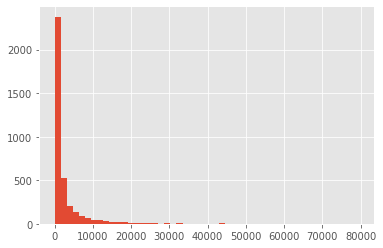

In [4]:
plt.hist(df.query("num_subscribers<80000").num_subscribers,bins=50);

Apparently most of the courses still cluster in the lower end bins with fewer than 10,000 subscribers and there are still some large courses that get drowned out if we do not use the log scale - so lets bring it back:

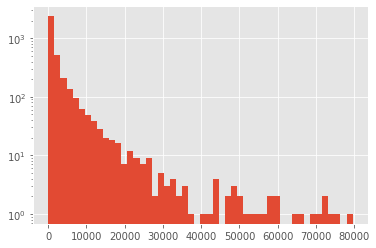

In [5]:
plt.hist(df.query("num_subscribers<80000").num_subscribers,bins=50)
plt.yscale('log')

We can now see three distinct regions in the subscriber data:
1. Many courses have less than 2000 subscribers.
2. There is a middle region where a linear fit (to a log scale) might do a reasonable job of approximating the data.
3. Courses with more than 40,000 subscribers probably belong with the few outlier we took out earlier.

Lets try to zoom in some more and remove the log scale:

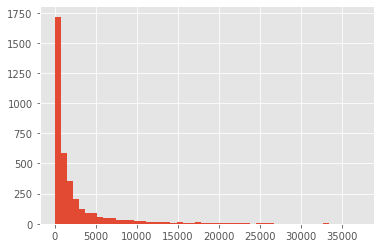

In [6]:
plt.hist(df.query("num_subscribers<40000").num_subscribers,bins=50);

With the log scale removed, the area under the histogram might tells us something meaningful about the distribution of course sizes.  But we are not there yet ...

We know from the earlier log plot that there are more than 10 courses with at least 30,000 subscribers each that are drowned out by the vertical scale of this plot.

Let's take a closer look at the courses on the lower end of the subscriber numbers that are drowning out our real data.  There may be a large number of these courses but with their low attentance they represent only a small portion of the student population:

sum(num_subscribers<100)=     26302
sum(num_subscribers    )=  11759120
Number of courses with num_subscribers<  20:  443
Number of courses with num_subscribers< 100:  885
Number of courses                          : 3678


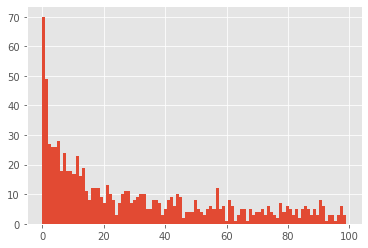

In [7]:
print("sum(num_subscribers<100)=    ", df.query("num_subscribers<100").num_subscribers.sum())
print("sum(num_subscribers    )= ",                                 df.num_subscribers.sum())
plt.hist(df.query("num_subscribers<100").num_subscribers,bins=100);
print("Number of courses with num_subscribers<  20: ",df.query("num_subscribers< 20").shape[0])
print("Number of courses with num_subscribers< 100: ",df.query("num_subscribers<100").shape[0])
print("Number of courses                          :",                              df.shape[0])


Let's plot the cumulative number of subscribers when we sort the data:

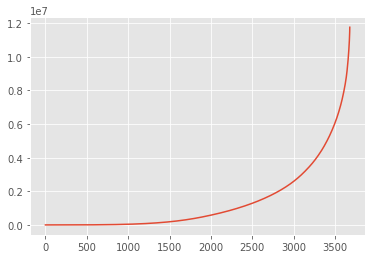

In [8]:
Sorted_subsc = df.num_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

We see that the lower 3000 courses (about 80% of the courses) have fewer than 25% of the total subscribers.  Most of the subscribers are enrolled in the top 20% of courses (in terms of popularity) - which should not be surprising.  What it does tell us is that we need to be careful in applying statistical tools like averages and medians which are meaningless in this type of data.

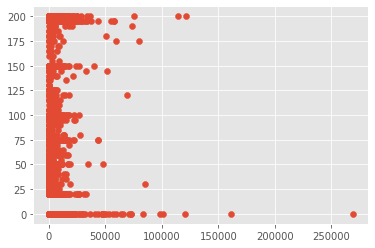

In [9]:
plt.scatter(df.num_subscribers,df.price)